In [131]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_mouse_clin = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
merge_mouse_clin.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [132]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data = merge_mouse_clin.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_data_df = pd.DataFrame(tumor_data)
# Preview DataFrame
tumor_data_df.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [133]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_data_sem = merge_mouse_clin.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_data_sem = pd.DataFrame(tumor_data_sem)

# Preview DataFrame
tumor_data_sem.head(10)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977

In [134]:
# Minor Data Munging to Re-Format the Data Frames
tumor_data_pivot = tumor_data_df.pivot_table(index = 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_data_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


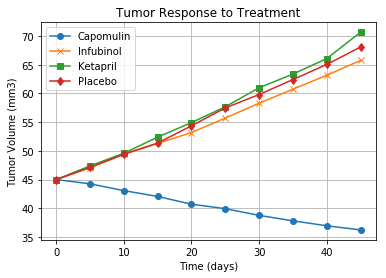

In [135]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
error = tumor_data_sem
fig, ax = plt.subplots()
#tumor_data_sem_series = tumor_data_sem.reset_index()['Tumor Volume (mm3)']
#plt.line(x_axis, tumor_data_pivot["Capomulin"], color= "red", linewidth="4", marker="o")

plt.plot(x_axis, tumor_data_pivot["Capomulin"], marker = "o", label = "Capomulin")
plt.plot(x_axis, tumor_data_pivot["Infubinol"], marker = "x", label = "Infubinol")
plt.plot(x_axis, tumor_data_pivot["Ketapril"], marker = "s", label = "Ketapril")
plt.plot(x_axis, tumor_data_pivot["Placebo"], marker = "d", label = "Placebo")

#plt.errorbar(x_axis, tumor_data_pivot["Infubinol"], xerr=None, yerr= "tumor_data_sem", fmt="o")
#plt.errorbar(x_axis, tumor_data_pivot["Placebo"], tumor_data_sem, fmt="o")

ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid()
ax.set_title("Tumor Response to Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )

#Save Fig
plt.savefig("tumor_response_to_treatment.png")


In [136]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [137]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_data_met = merge_mouse_clin.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
tumor_data_met = pd.DataFrame(tumor_data_met)

# Preview DataFrame
tumor_data_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [138]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_met_sem = merge_mouse_clin.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
tumor_met_sem = pd.DataFrame(tumor_met_sem)
# Preview DataFrame
tumor_met_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [139]:
# Minor Data Munging to Re-Format the Data Frames
tumor_met_pivot = tumor_data_met.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
tumor_met_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


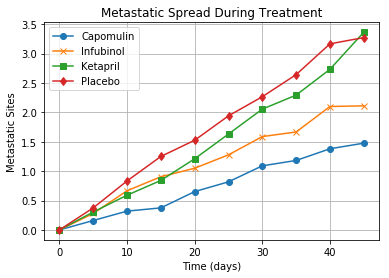

In [140]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)

fig, ax = plt.subplots()

plt.plot(x_axis, tumor_met_pivot["Capomulin"], marker = "o", label = "Capomulin")
plt.plot(x_axis, tumor_met_pivot["Infubinol"], marker = "x", label = "Infubinol")
plt.plot(x_axis, tumor_met_pivot["Ketapril"], marker = "s", label = "Ketapril")
plt.plot(x_axis, tumor_met_pivot["Placebo"], marker = "d", label = "Placebo")


ax.set_xlabel("Time (days)")
ax.set_ylabel("Metastatic Sites")
ax.grid()
ax.set_title("Metastatic Spread During Treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
# Save the Figure
plt.savefig("met_spread_during_treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [141]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
tumor_data_surv = merge_mouse_clin.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
tumor_data_surv = pd.DataFrame(tumor_data_surv)
# Preview DataFrame
tumor_data_surv.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [142]:
# Minor Data Munging to Re-Format the Data Frames
tumor_surv_pivot = tumor_data_surv.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
tumor_surv_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [143]:
#Percentages of Survival for each drug 

tumor_surv_pivot["Capomulin_percent"]=tumor_surv_pivot["Capomulin"]/tumor_surv_pivot["Capomulin"].iloc[0] * 100
tumor_surv_pivot["Infubinol_percent"]=tumor_surv_pivot["Infubinol"]/tumor_surv_pivot["Infubinol"].iloc[0] * 100
tumor_surv_pivot["Ketapril_percent"]=tumor_surv_pivot["Ketapril"]/tumor_surv_pivot["Ketapril"].iloc[0] * 100
tumor_surv_pivot["Placebo_percent"]=tumor_surv_pivot["Placebo"]/tumor_surv_pivot["Placebo"].iloc[0] * 100


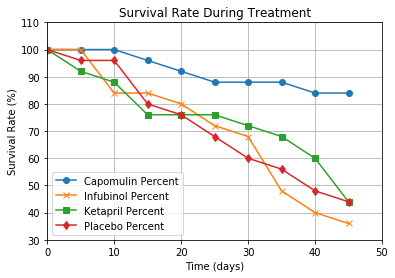

In [144]:
# Generate the Plot (Accounting for percentages)

x_axis = np.arange(0,50,5)

fig, ax = plt.subplots()

plt.plot(x_axis, tumor_surv_pivot["Capomulin_percent"], marker = "o", label = "Capomulin Percent")
plt.plot(x_axis, tumor_surv_pivot["Infubinol_percent"], marker = "x", label = "Infubinol Percent")
plt.plot(x_axis, tumor_surv_pivot["Ketapril_percent"], marker = "s", label = "Ketapril Percent")
plt.plot(x_axis, tumor_surv_pivot["Placebo_percent"], marker = "d", label = "Placebo Percent")

ax.set_xlim(0,50,5)
ax.set_ylim(30,110)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival Rate During Treatment")
ax.grid()
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )

# Save the Figure
plt.savefig("surv_rate_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

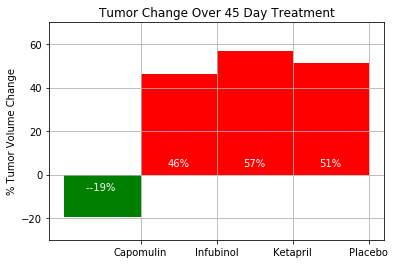